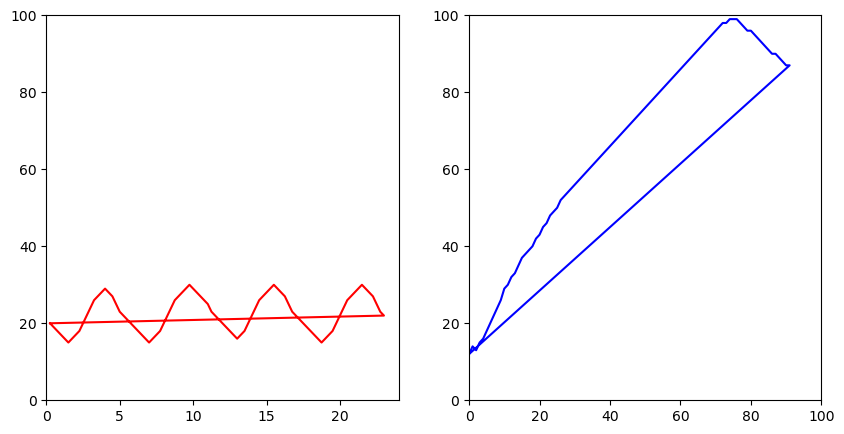

In [2]:


from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
import pandas as pd

# Read in the CSVs to panda dataframes
temp_df = pd.read_csv("./data/temps.csv")
memory_df = pd.read_csv("./data/cpu.csv")

# Lists to hold the line values of temp x and y access
temp_x = []
temp_y = []

# Lists to hold the line values of memory x and y axis 
memory_x = []
memory_y = []

figure, (l_ax, r_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Set the limits on the axes you are using for the animation
l_ax.set_xlim(0, 24)
l_ax.set_ylim(0, 100)

r_ax.set_xlim(0, 100)
r_ax.set_ylim(0, 100)

# Initialize lines for both subplots
l_line, = l_ax.plot([], [], 'r-')  # Let's use red solid line for left plot
r_line, = r_ax.plot([], [], 'b-')  # Let's use blue solid line for right plot

# Function to update the plot for each frame of the animation
def animation_function(i):
    # Get the temperature and memory values for the current frame
    temp = int(temp_df.iloc[i]["Temperature"])
    time = temp_df.iloc[i]["Hour"]

    # Append next time and temp to the first subplot
    temp_x.append(time)
    temp_y.append(temp)

    # Get the memory and time values for the current frame
    memory = int(memory_df.iloc[i]["CPU_Usage"])
    time = memory_df.iloc[i]["Timestamp"]

    # Append next time and memory to the second subplot
    memory_x.append(time)
    memory_y.append(memory)

    # Update data for temp chart
    l_line.set_xdata(temp_x)
    l_line.set_ydata(temp_y)
    
    # Update data for memory chart
    r_line.set_xdata(memory_x)
    r_line.set_ydata(memory_y)
    
    # Return the lines to update the plots
    return l_line, r_line,

# Create the animation object that will call the animate function to repaint the plot
animation = FuncAnimation(figure,
                          func=animation_function,
                          frames=np.arange(0, 92, 1),
                          interval=100)

# Convert the animation to HTML5 video so it can be displayed in a Jupyter Notebook
html = animation.to_html5_video()

# Display the animation
HTML(html)  

